## Decision Tree 

Supervised ML technique that can be used for regression and Classification

In [1]:
import pandas as pd  #importing libraries for basic data handling and data visualisation 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Meta scifor\Machine Learning\Datasets\Advertisements.csv") #importing the dataset from a csv file

### 1. Basic EDA

In [3]:
df.info() #printing the basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.shape #Shape of the dataset

(400, 5)

In [5]:
df.head(3) #printing the first 3 rows of the dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [6]:
df.describe() #Statistical description of the dataset

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isna().sum()  #Checking for null values in the dataset

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No null values in the dataset

In [8]:
df.duplicated('User ID').value_counts() #Checking for duplicated values in the dataset

False    400
dtype: int64

No duplicate values in the dataset

In [9]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

1 - Purchased 0 - Not purchased

### 2. Building a Decision tree model based on age and estimated Salary, whether purchased or not

In [10]:
from sklearn.model_selection import train_test_split  
#importing train_test_split from sklearn for splitting the dataset into train and test data

In [11]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values    #assigning X and y variables
#x- age and estimated salary 
#y - Purchased or not

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [13]:
X_train.shape

(300, 2)

In [14]:
X_test.shape

(100, 2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
DTC1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5,random_state=10)
DTC1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
                       random_state=10)

In [17]:
y_pred=DTC1.predict(X_test)

In [18]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [19]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[57,  6],
       [ 5, 32]], dtype=int64)

Confusion Matrix displays the number of true positives, true negatives, false positives, and false negatives.
From the confusion matrix, it can be inferred that
1. Out of 100 test data, 89 samples are classified correctly.
2. 11 are misclassified. 6 are False Positives and 5 - False Negatives.

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.84      0.86      0.85        37

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [22]:
print(accuracy_score(y_test,y_pred)) #Accuracy score = (TP+TN)/(TP+TN+FP+FN)

0.89


In [23]:
from sklearn.metrics import recall_score,precision_score

In [24]:
print(recall_score(y_test,y_pred)) #recall= TP/(TP+FN)

0.8648648648648649


In [25]:
print(precision_score(y_test,y_pred)) #precision = TP/(TP+FP)

0.8421052631578947


In [26]:
import sklearn.metrics as metrics 
print('AUC-ROC score is:',metrics.roc_auc_score(y_test,y_pred)) 
#A Receiver Operating Characteristic (ROC) SCORE is a RATIO of true positive rate against false positive rate for different threshold values.

AUC-ROC score is: 0.8848133848133848


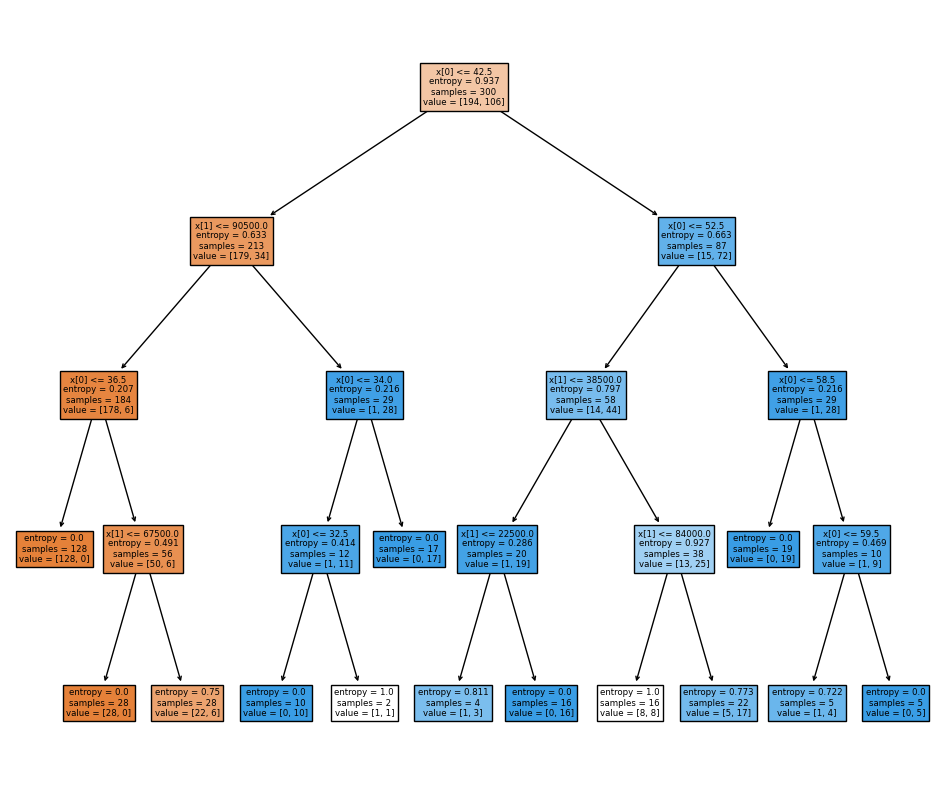

In [27]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(DTC1,filled=True)
plt.show()